# **DIPLOMATURA UNIVERSITARIA EN CIENCIA DE DATOS**

# Módulo 5: Aprendizaje No Supervisado

## REDUCCIÓN DE DIMENSIONALIDAD: Análisis en componentes principales (PCA).

## **Docentes:** Lic. Luis Duarte - Dra. Griselda Bobeda  - Dra. Magdalena Lucini

### Octubre 2024, FaCENA - UNNE

### Contacto:  
* luis.duarte@comunidad.unne.edu.ar;
* griseldabobeda@gmail.com;
* mmlucini@comunidad.unne.edu.ar

Objetivos:


Aplicar diferentes técnicas de reducción de dimensionalidad a situaciones con datos reales.
Realizar análisis gráfico de resultados.



1. ANÁLISIS DE COMPONENTES INDEPENDIENTES (ICA)

El ICA es un tipo de  algoritmo de reducción de dimensionalidad  que transforma un conjunto de variables en un nuevo conjunto de componentes; lo hace de tal manera que se maximiza la independencia estadística entre los nuevos componentes. El ICA maximiza la independencia estadística en lugar de simplemente desarrollar componentes que no están correlacionados.

##**BASE DE DATOS: WINE**

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
wine_data = load_wine()
X = wine_data.data
y = wine_data.target
column_names = wine_data.feature_names
# Cargar la base de datos
wine = load_wine()


# Convertir a un DataFrame de pandas
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Mostrar las primeras filas del DataFrame
df_wine.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Features: 13 características químicas (como la cantidad de alcohol, ácido málico, etc.)
Target: La clase a la que pertenece el vino (0, 1 o 2), que representan tres diferentes cultivos.

In [ ]:
# Mostrar descripción del dataset
print(wine.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

1.2 CARGA Y PREPROCEDADOS DE LOS DATOS

- ¿Por qué es importante centrar y estandarizar los datos antes de aplicar ICA?

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Estandarizar las características para tener media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_wine)

# Mostrar las primeras filas de los datos escalados
pd.DataFrame(X_scaled, columns=wine.feature_names).head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### 1.3 APLICAR ANALISIS DE COMPONENTES INDEPENDIENTES (ICA)

-

In [ ]:
# Import the necessary class
from sklearn.decomposition import FastICA

# Aplicar ICA
ica = FastICA(n_components=13, random_state=0)
X_ica = ica.fit_transform(X_scaled)

# Convertir los componentes independientes en un DataFrame
df_ica = pd.DataFrame(X_ica, columns=[f'IC{i+1}' for i in range(13)])

# Mostrar las primeras filas de los componentes independientes
df_ica.head()


,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13
0,-1.775725,0.136862,-0.186977,1.498412,-0.309902,0.461396,0.900097,0.943404,1.567318,0.911688,0.474309,-0.466474,1.267385
1,0.110964,-0.951367,-0.583417,-0.629834,1.063393,-0.549632,0.846287,1.555522,0.924234,0.585507,-0.620972,-1.311365,0.581070
2,1.029866,-0.570201,2.084496,0.189292,-0.310892,0.376628,0.642535,-1.161636,1.115679,0.297341,0.279823,-0.396642,0.328699
3,0.732709,-0.170439,0.071278,-0.307597,-0.540981,-0.732622,-1.166183,0.713782,2.053616,0.904856,-0.641069,1.294148,1.406791
4,-0.536499,1.017761,-0.213547,0.607735,-0.016776,1.044379,0.395820,-0.705915,1.147856,-0.177128,-1.343076,0.117771,-0.260131


### 1.4 GRAFICAR LAS COMPONENTES INDEPENDIENTES

El ICA es utilizado para separar señales o componentes que son estadísticamente independientes entre sí. En este caso, los cinco gráficos representan cinco componentes separados que podrían haber sido mezclados originalmente en los datos de entrada.

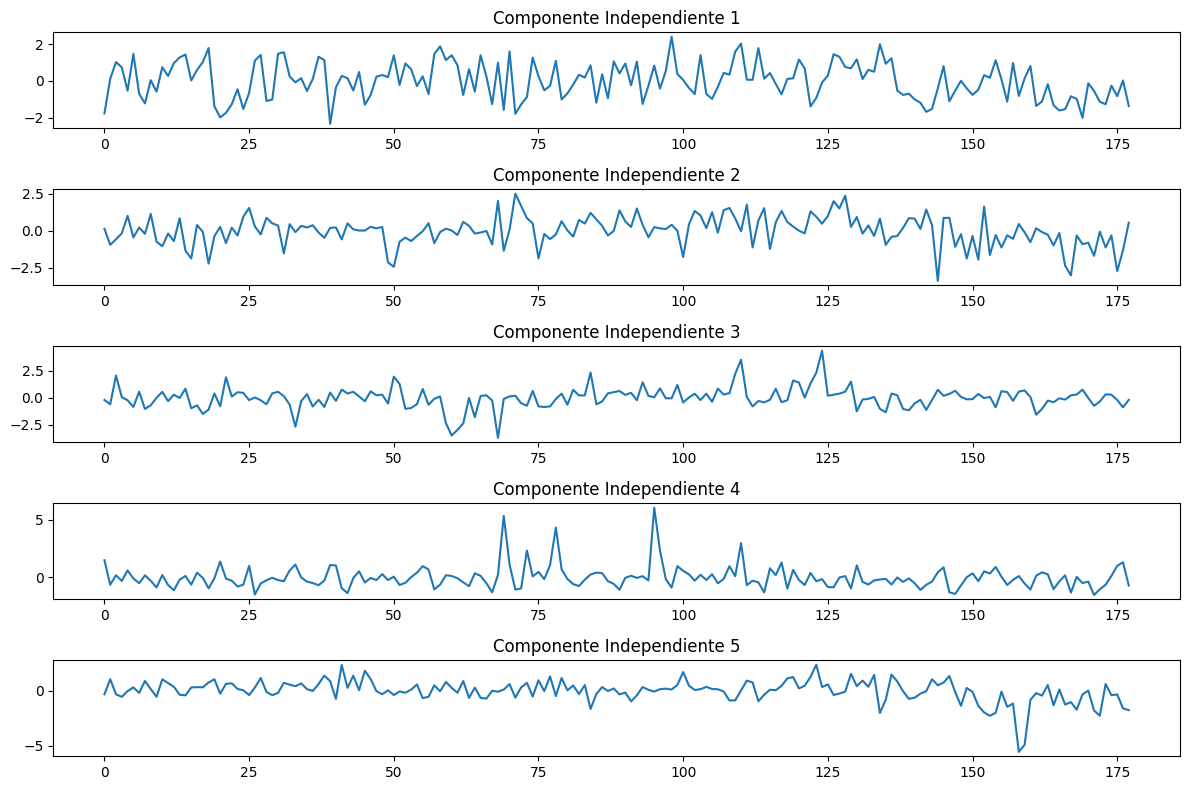

In [ ]:
# Graficar las primeras 5 señales (componentes independientes)
plt.figure(figsize=(12, 8))

for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.plot(df_ica[f'IC{i+1}'])
    plt.title(f'Componente Independiente {i+1}')

plt.tight_layout()
plt.show()


# 1.6. COMPARACION CON PCA

-¿Cuál es la principal diferencia entre PCA e ICA en términos de objetivo?

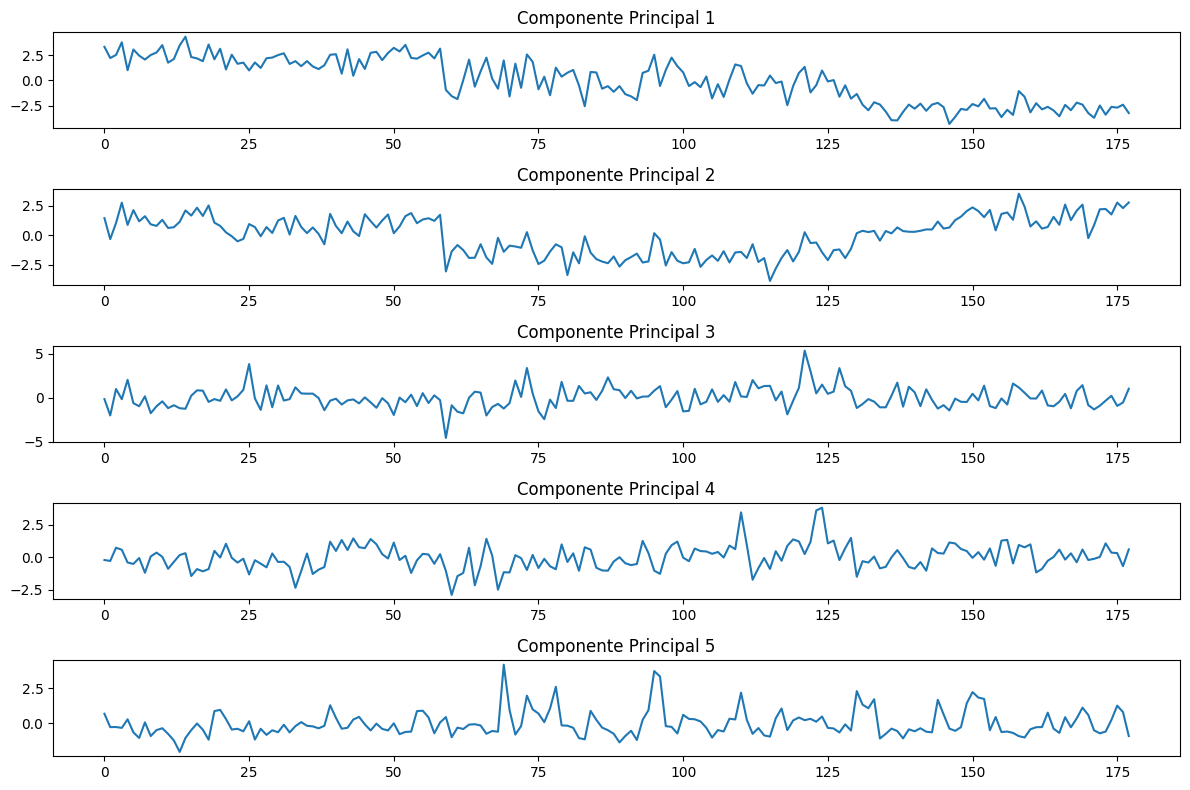

In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=13)
X_pca = pca.fit_transform(X_scaled)

# Convertir los componentes de PCA en un DataFrame
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(13)])

# Graficar las primeras 5 componentes principales
plt.figure(figsize=(12, 8))

for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.plot(df_pca[f'PC{i+1}'])
    plt.title(f'Componente Principal {i+1}')

plt.tight_layout()
plt.show()


 **a. Comparación de ICA con PCA en Reducción de Dimensionalidad**

 ¿Qué diferencias claves se encuentran entre el análisis de componentes principales (PCA) y el de componentes independientes (ICA) en este conjunto de datos?

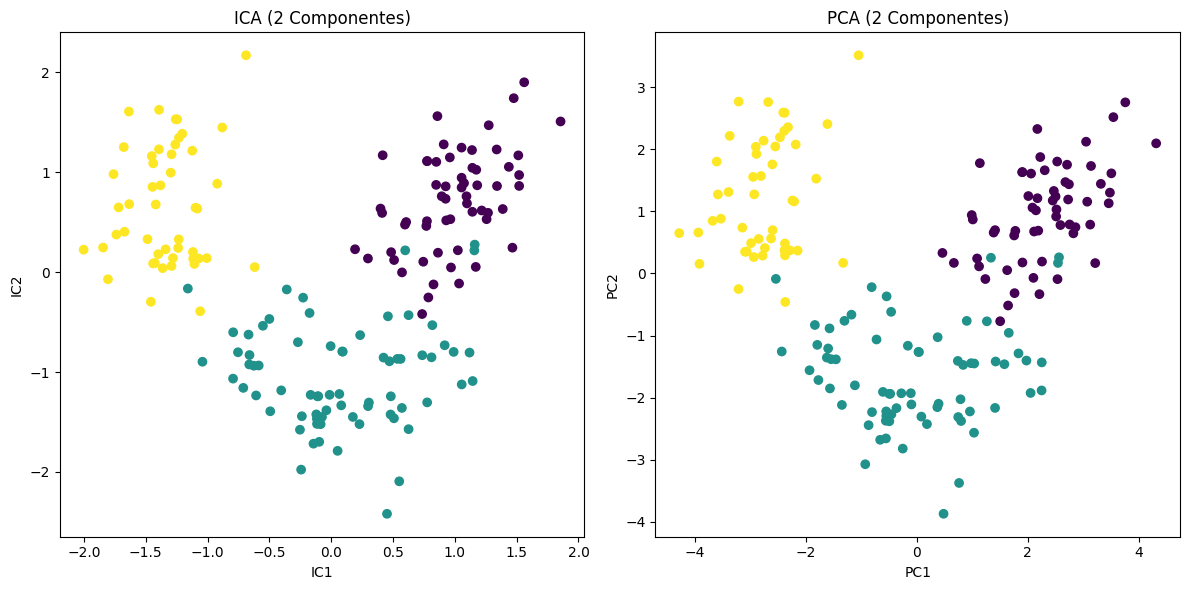

In [ ]:
# Aplicar ICA con 2 componentes
ica_2d = FastICA(n_components=2, random_state=0)
X_ica_2d = ica_2d.fit_transform(X_scaled)

# Aplicar PCA con 2 componentes
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Convertir a DataFrames
df_ica_2d = pd.DataFrame(X_ica_2d, columns=['IC1', 'IC2'])
df_ica_2d['target'] = wine.target

df_pca_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['target'] = wine.target

# Graficar la proyección en 2D para ICA
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_ica_2d['IC1'], df_ica_2d['IC2'], c=df_ica_2d['target'])
plt.title('ICA (2 Componentes)')
plt.xlabel('IC1')
plt.ylabel('IC2')

# Graficar la proyección en 2D para PCA
plt.subplot(1, 2, 2)
plt.scatter(df_pca_2d['PC1'], df_pca_2d['PC2'], c=df_pca_2d['target'])
plt.title('PCA (2 Componentes)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()


**b. Realizar una vizualización 3D**

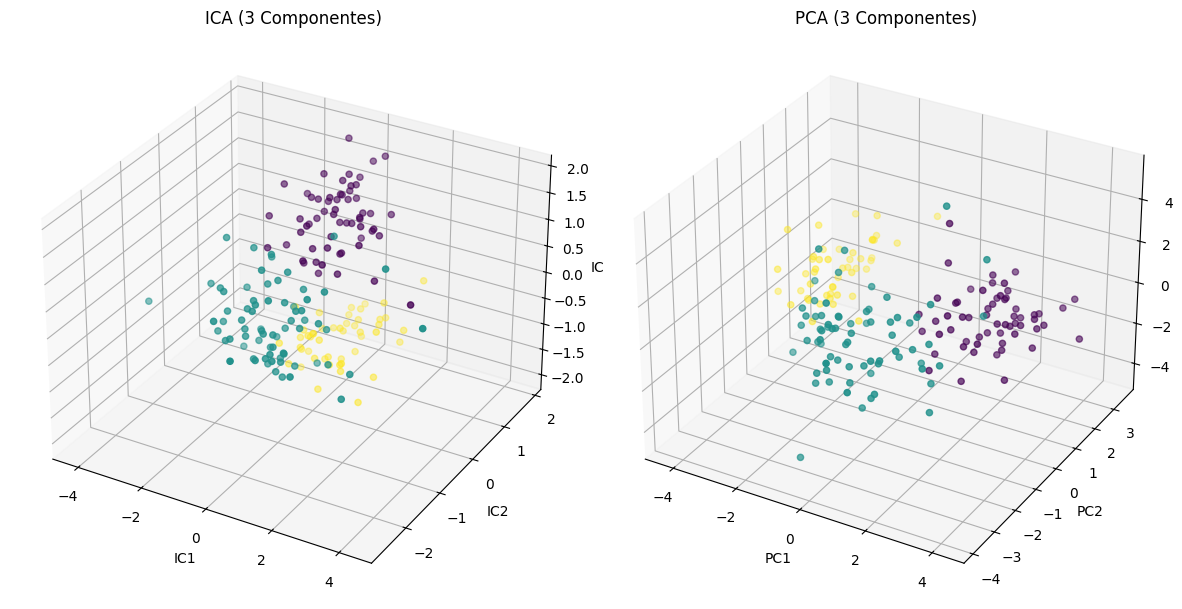

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Reducir a 3 dimensiones con ICA y PCA
ica_3d = FastICA(n_components=3, random_state=0)
X_ica_3d = ica_3d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Convertir a DataFrames
df_ica_3d = pd.DataFrame(X_ica_3d, columns=['IC1', 'IC2', 'IC3'])
df_ica_3d['target'] = wine.target

df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['target'] = wine.target

# Visualización en 3D para ICA
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df_ica_3d['IC1'], df_ica_3d['IC2'], df_ica_3d['IC3'], c=df_ica_3d['target'])
ax1.set_title('ICA (3 Componentes)')
ax1.set_xlabel('IC1')
ax1.set_ylabel('IC2')
ax1.set_zlabel('IC3')

# Visualización en 3D para PCA
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], c=df_pca_3d['target'])
ax2.set_title('PCA (3 Componentes)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

plt.tight_layout()
plt.show()


2.
TECNICAS DE REDUCCIÓN DE DIMENSIONALIDAD

**t-SNE (t-distributed Stochastic Neighbor Embedding)**

Es una técnica de reducción de dimensionalidad no lineal no supervisada para la exploración y visualización de datos de alta dimensión. La reducción de dimensionalidad no lineal significa que el algoritmo nos permite separar datos que no se pueden separar con una línea recta.

# 2.1 : Cargar el dataset y normalizarlo

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset Wine
wine = load_wine()

# Convertir el dataset en un DataFrame de pandas
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Escalar los datos (normalización con media 0 y varianza 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_wine)

# Mostrar las primeras filas del DataFrame escalado
df_wine.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0



# 2.2 Aplicar t-SNE

Aplicamos t-SNE para reducir las 13 dimensiones de los datos del vino a solo 2 componentes. Esto nos permitirá visualizar los datos en un gráfico bidimensional.

In [ ]:
# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Convertir a DataFrame para facilidad de uso
df_tsne = pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2'])

# Agregar la columna de la clase (el target)
df_tsne['target'] = wine.target

# Mostrar las primeras filas del DataFrame t-SNE
df_tsne.head()


,t-SNE1,t-SNE2,target
0,9.525720,-9.643628,0
1,8.345544,-2.877941,0
2,8.376868,-6.621422,0
3,11.872837,-7.470367,0
4,4.431345,-7.277541,0


# 2.3. Visualización de los resultados

- Después de ejecutar el algoritmo,  visualizar los datos transformados.
La visualización ayuda a identificar los patrones inherentes en los datos que no podemos detectar en espacios de alta dimensión.

*¿Cómo interpretamos un gráfico t-SNE?*


<Axes: xlabel='t-SNE1', ylabel='t-SNE2'>

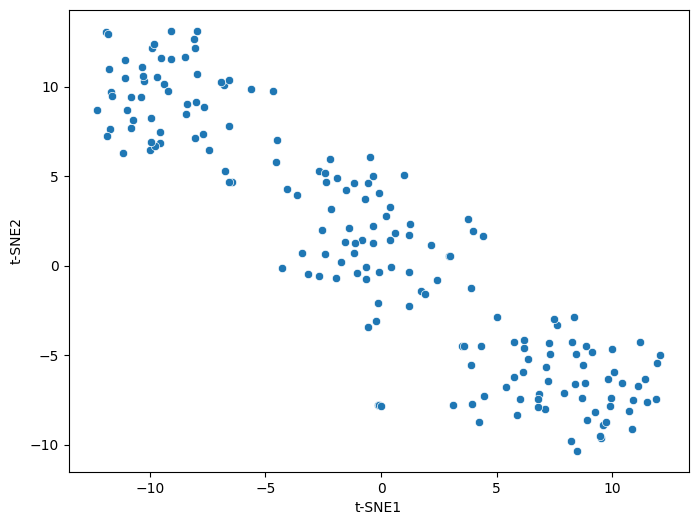

In [ ]:
#Graficar los resultados obtenidos de t-NSE
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2',  data=df_tsne)

Gráficar los t-NSE identificados por clases de vino

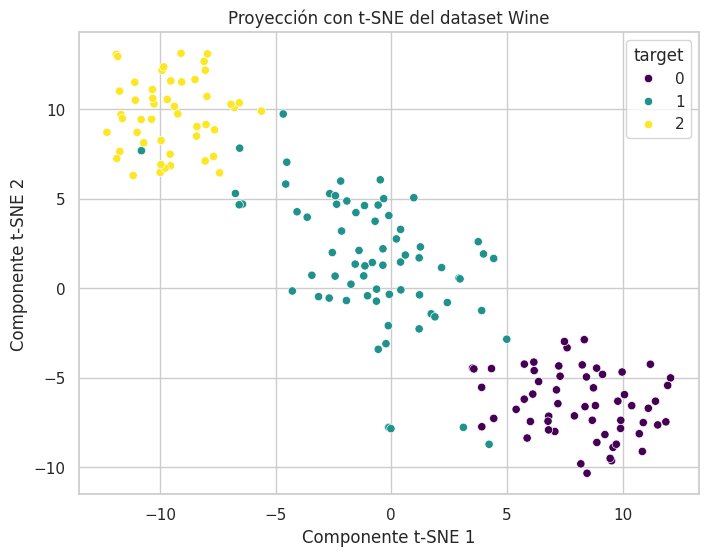

In [ ]:
# Configurar el estilo de visualización
sns.set(style="whitegrid")

# Graficar el resultado de t-SNE
plt.figure(figsize=(8, 6))

sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='target', palette='viridis', data=df_tsne)
plt.title('Proyección con t-SNE del dataset Wine')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.show()


En este gráfico, los puntos representan las instancias del dataset Wine, y los colores indican la clase de cada vino (0, 1 o 2). Las clases deberían estar agrupadas de manera que vinos similares (en términos de sus características químicas) se encuentren cerca entre sí.

# 2.4  Aplicación de Hiperparámetros

Defina los hiperparámetros del t-SNE.

Uno de los parámetros más importantes de t-SNE es el **perplexity**, que controla el equilibrio entre la preservación de la estructura local y global.

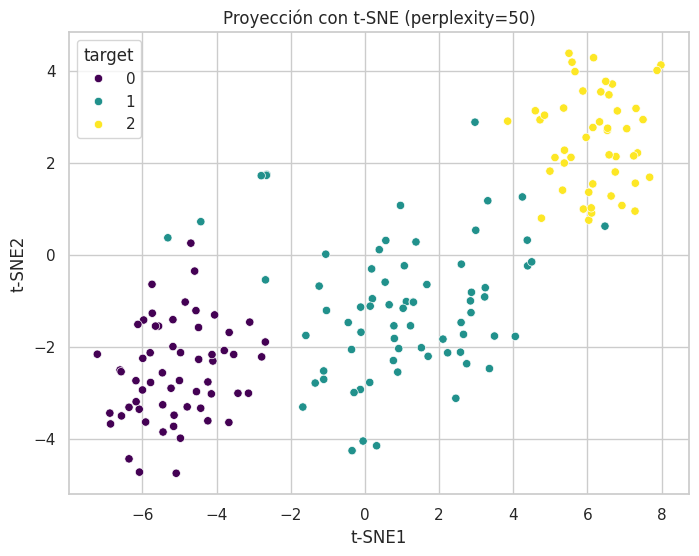

In [ ]:
# Probar con un valor diferente de perplexity
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Convertir a DataFrame para facilidad de uso
df_tsne = pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2'])
df_tsne['target'] = wine.target

# Graficar el resultado de t-SNE con perplexity ajustado
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='target', palette='viridis', data=df_tsne)
plt.title('Proyección con t-SNE (perplexity=50)')
plt.show()


# 2.5 Vamos a explorar otros valores de perplexity
- Indique que sucede cuando incorporamos más valores de otros hiperparámetros

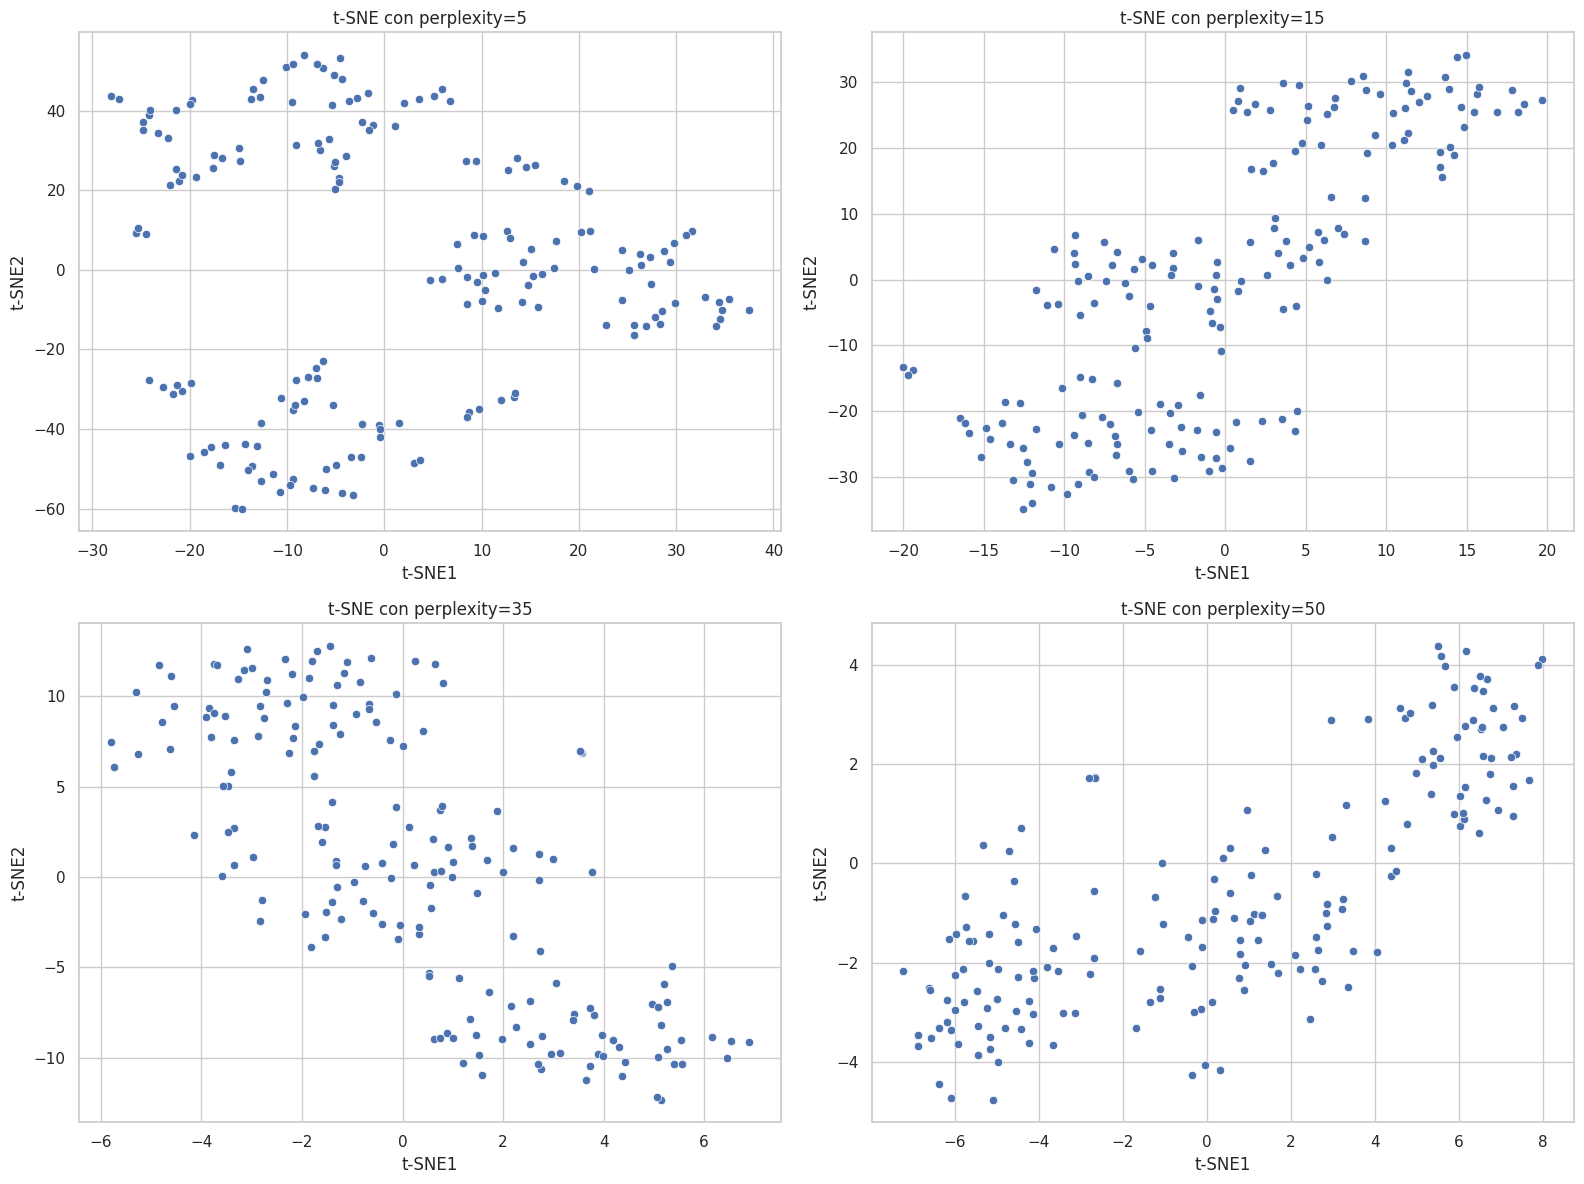

In [ ]:
# Probar con diferentes valores de perplexity
perplexities = [5, 15, 35, 50]

plt.figure(figsize=(16, 12))

for i, perplexity in enumerate(perplexities, 1):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    df_tsne = pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2'])
    df_tsne['target'] = wine.target

    # Graficar el resultado de t-SNE con diferentes perplexities
    plt.subplot(2, 2, i)
    sns.scatterplot(x='t-SNE1', y='t-SNE2', data=df_tsne)
    plt.title(f't-SNE con perplexity={perplexity}')

plt.tight_layout()
plt.show()


- Si los puntos de las clases están agrupados y separados claramente, t-SNE ha capturado bien la estructura de los datos.
- Si ves solapamiento entre clases, podría ser útil ajustar el valor de `perplexity` o aplicar técnicas de preprocesamiento adicionales.


 **- UMAP (Uniform Manifold Approximation and Projection)**

Consiste en la aproximación y proyección de variedades uniformes (UMAP) es una técnica de reducción de dimensión que se puede utilizar para la visualización de forma similar a la t-SNE, pero también para la reducción de dimensión no lineal general.

In [ ]:
# Instalar UMAP en Colab
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


# 2.6 Cargar los datos y procesarlos

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset Wine
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Estandarizar los datos (media 0 y varianza 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_wine)

# Convertir la columna objetivo (target) en una Serie de pandas
y = pd.Series(wine.target)

# Mostrar las primeras filas del DataFrame escalado
df_wine.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# 2.7. Aplicar UMAP

In [ ]:
# Aplicar UMAP con 2 componentes
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Convertir a DataFrame para facilidad de uso
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['target'] = y

# Mostrar las primeras filas del DataFrame UMAP
df_umap.head()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,UMAP1,UMAP2,target
0,9.839874,5.942630,0
1,9.810246,7.158169,0
2,11.167402,6.980323,0
3,11.311870,6.036488,0
4,10.849413,8.274706,0


# 2.8 Vizualizar los resultados

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

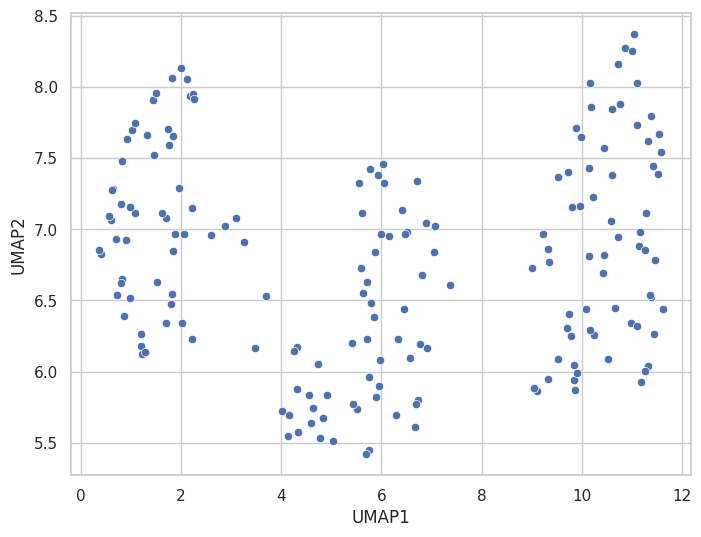

In [ ]:
#Graficar los resultados de UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', data=df_umap)

Graficar los resultados identificados por clases de vino

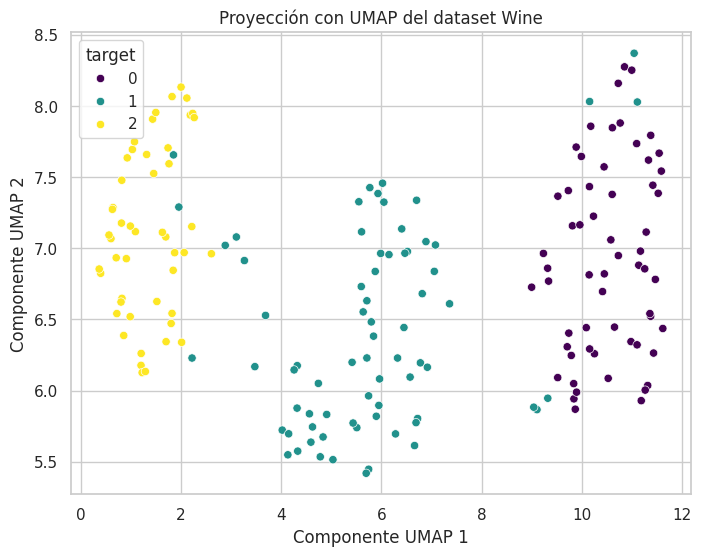

In [ ]:
# Configurar el estilo de visualización
sns.set(style="whitegrid")

# Graficar el resultado de UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='target', palette='viridis', data=df_umap)
plt.title('Proyección con UMAP del dataset Wine')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.show()


# **BASE DE DATOS: IRIS**


In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA

# Configuración de visualización
sns.set(style="whitegrid")


# 1.1. PROCEDADO DE DATOS IRIS

In [ ]:
# Cargar el dataset Iris
iris = load_iris()

# Convertir el dataset a un DataFrame de pandas
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Añadir la columna de especie
df_iris['species'] = iris.target

# Escalar los datos (excluyendo la columna de especie)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_iris.drop('species', axis=1))

# Mostrar las primeras filas del DataFrame
df_iris.head()


# 1.2. APLICAR ICA


In [ ]:
# Aplicar ICA
ica = FastICA(n_components=2, random_state=42)  # Elegimos 2 componentes para este ejemplo
X_ica = ica.fit_transform(X_scaled)

# Convertir el resultado a un DataFrame
df_ica = pd.DataFrame(X_ica, columns=['IC1', 'IC2'])

# Añadir la columna de especie al DataFrame de componentes independientes
df_ica['species'] = df_iris['species']

# Mostrar las primeras filas del DataFrame de componentes independientes
df_ica.head()


# 1.3 Visualización de los componentes independientes

-Indique que vizualiza con las componentes independientes generadas


In [ ]:
# Graficar los componentes independientes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IC1', y='IC2', hue='species', palette='viridis', data=df_ica, alpha=0.7)
plt.title('Componentes Independientes: IC1 vs IC2')
plt.xlabel('Componente Independiente 1 (IC1)')
plt.ylabel('Componente Independiente 2 (IC2)')
plt.axhline(0, color='grey', lw=1, ls='--')
plt.axvline(0, color='grey', lw=1, ls='--')
plt.legend(title='Especies', loc='upper right', labels=iris.target_names)
plt.show()


# 1.4 Evaluación de la independencia de los componentes

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df_ica[['IC1', 'IC2']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Componentes Independientes')
plt.show()


## **BASE DE DATOS DIGITS**

In [ ]:
# Importar las bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

# Configuración de visualización
sns.set(style="whitegrid")


# 1.2. Cargar datos y preprocesarlos

1.2 Se utiliza la función load_digitsde sklearn.datasetspara cargar el conjunto de datos de dígitos. Este conjunto contiene imágenes de dígitos (0-9) en un formato de matriz.

In [ ]:
# Cargar el dataset Digits
digits = load_digits()

# Convertir el dataset a un DataFrame de pandas
df_digits = pd.DataFrame(data=digits.data)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_digits)

# Mostrar las primeras filas del DataFrame
df_digits.head()


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


# 1.3. Aplicar ICA

In [ ]:
# Aplicar ICA
ica = FastICA(n_components=10, random_state=42)  # Elegimos 10 componentes para este ejemplo
X_ica = ica.fit_transform(X_scaled)

# Convertir el resultado a un DataFrame
df_ica = pd.DataFrame(X_ica, columns=[f'IC{i+1}' for i in range(X_ica.shape[1])])

# Mostrar las primeras filas del DataFrame de componentes independientes
df_ica.head()


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10
0,0.539071,-0.641637,-1.551482,0.082531,-1.725621,0.031963,-0.005244,0.346177,-0.325593,-0.289134
1,-1.585035,0.975905,0.350648,1.019834,1.106193,-0.118329,0.080562,-0.533331,1.510666,0.166523
2,-1.981456,-0.412905,0.105615,0.485628,-0.547211,-0.740291,0.009777,-0.398783,1.900550,-1.070447
3,1.106293,0.505594,0.563327,0.051871,0.547176,-0.561411,0.533172,-0.310131,-1.313726,-0.406588
4,0.073756,-0.223684,-0.657838,-0.565802,1.358063,1.366422,0.740596,-0.334660,0.341394,-1.700711


# 1.4 Gráficos originales

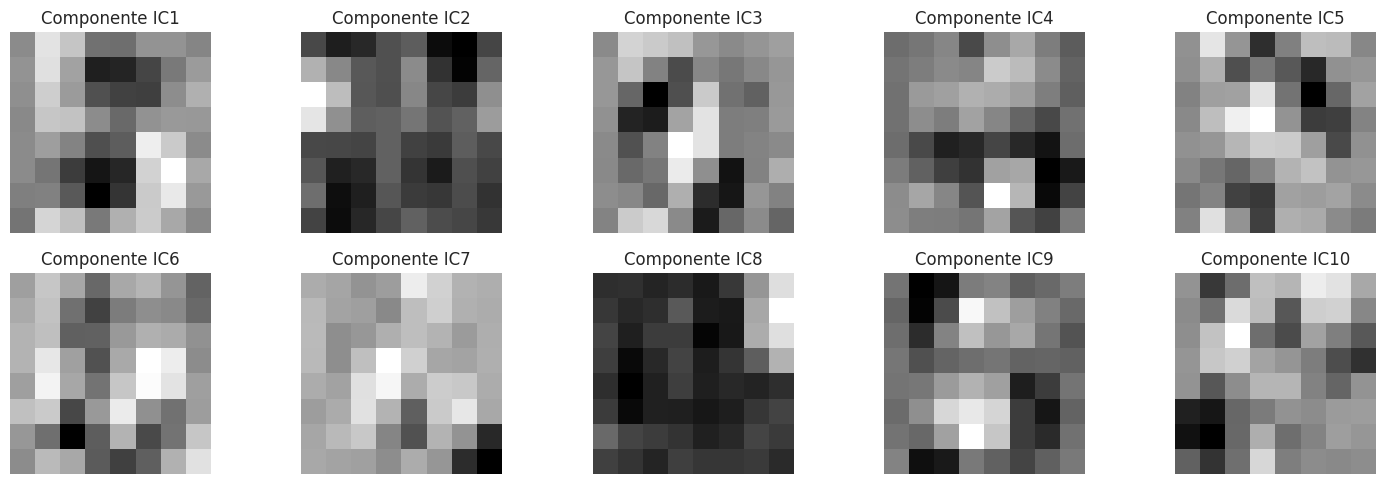

In [ ]:
# Graficar los componentes independientes como imágenes
n_components = 10
plt.figure(figsize=(15, 5))
for i in range(n_components):
    plt.subplot(2, 5, i + 1)
    plt.imshow(ica.components_[i].reshape(8, 8), cmap='gray')
    plt.title(f'Componente IC{i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


# 1.5 Comparación de señales

Que sucede cuando graficamos las imágenes originales junto a sus compoonentes?

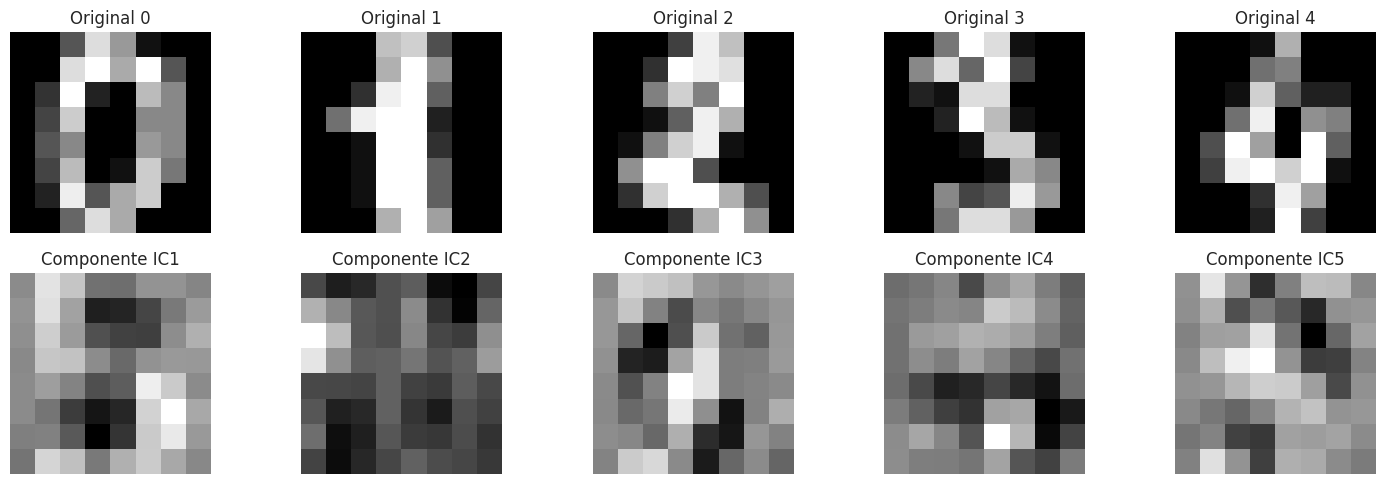

In [ ]:
# Graficar algunas imágenes originales junto a sus componentes
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Original {i}')
    plt.axis('off')

for i in range(5):
    plt.subplot(2, 5, i + 6)
    plt.imshow(ica.components_[i].reshape(8, 8), cmap='gray')
    plt.title(f'Componente IC{i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()
